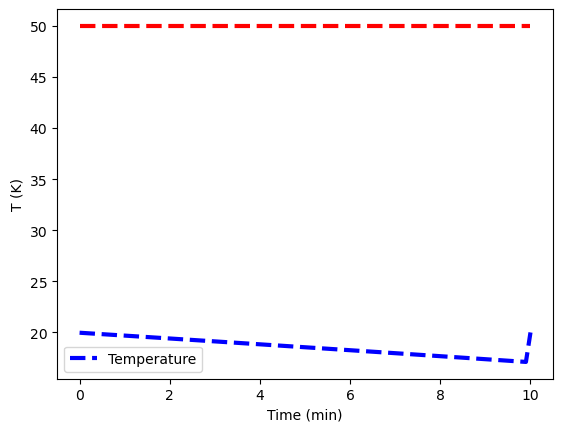

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ta = 20

# Initial Conditions for the States
y0 = [Ta]

# Time Interval (min)
t = np.linspace(0,10,100)

# Storage for results
us  = np.ones(len(t))*50
Ts = np.ones(len(t))*Ta

def labsim(TC: float, t: float, Q1: float) -> float:
    U: float = 10.0
    A: float = 0.0012
    Cp: float = 500
    m: float = 0.004
    alpha: float = 0.01
    Ta: float = 25.0  # Assuming Ta is a constant temperature

    dTCdt: float = (U * A * (Ta - TC) + alpha * Q1) / (m * Cp)
    return dTCdt



# Loop through each time step
for i in range(len(t)-1):
    # Simulate
    inputs = (us[i],)
    ts = (t[i+1],t[i])
    y = odeint(labsim,y0,ts,args=inputs)

    # Store results
    Ts[i]  = y[-1][0]
    us[i] = inputs[0]
    
    # Adjust initial condition for next loop
    y0 = y[-1]

# Construct results and save data file
data = np.vstack((t,Ts,us)) # vertical stack
data = data.T             # transpose data
np.savetxt('data.txt',data,delimiter=',')

# Plot the inputs and results
plt.figure()

plt.plot(t,Ts,'b--',linewidth=3)
plt.plot(t,us,'r--',linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'],loc='best')
plt.xlabel('Time (min)')

plt.show()